# Загрузка Модулей и очистка данных

In [1]:
import numpy as np  # Library for work with numerical data and matrix
import pandas as pd  # Library for work with data sets
import seaborn as sns  # Library for graphical presentation of data

# Импортируем необходимые библиотеки:
from IPython.display import display  # Display data
from pandas.core.common import flatten  # For turning series of list into array
from datetime import datetime  # Module for working with dates and time
from textblob import TextBlob as tb  # Module for sentimental text analysis
from sklearn.model_selection import train_test_split  # Загружаем специальный инструмент для разбивки:
from sklearn.ensemble import RandomForestRegressor  # инструмент для создания и обучения модели
from sklearn import metrics  # инструменты для оценки точности модели

# Function for turning string into list, divided with ','. Result of function is list or None value

In [2]:
def str_to_list(value):
    if pd.isna(value):
        return None  # If value is empty, return None for future analysis

    value = value.strip('["]')  # remove ], " and [
    value = value.replace("'", "")  # correct removal of symbol '
    for key, dic_val in replace_dic.items():  # replace values with dictionary key words
        value = value.replace(key, dic_val)
    value = value.split(', ')  # split string by , and space
    value = list(map(lambda x: x if x else None, value))  # replace empty values in list with None
    value = list(filter(None.__ne__, value)) # Remove None values from list
    
    if pd.isna(value).all():  # If all values in list are empty, turn list into None value
        value = None

    return value

# Function for split reviews column for lists with reviews (string) and dates (datetime)

In [3]:
def reviews_splitting(value):
    
    value=value.split('], [')
    reviews_list = str_to_list(value[0])  # Turn to list string with reviews
    date_list = str_to_list(value[1])  # Turn to list dates of reviews

    # If type of values is list, turn values into format datetime
    if type(date_list) is list:
        date_list = list(map(lambda x: None if pd.isna(x) else datetime.strptime(x, '%m/%d/%Y'), date_list))

    return [reviews_list, date_list]

# Function for filling dummies of cuisine data set. If values in cell is None, don't change it

In [4]:
def find_item(cell):
    try:
        if item in cell:
            return 1
        return 0
    except:
        return None

# Function for finding most popular cuisine for chosen city for next replacement

In [5]:
def pop_cuisine(city):
    max_ = 0
    indexes = meals_ds[meals_ds['City'] == city].index  # Find index for all elements with chosen city
    for cuisine in cuisine_set:  # Go through all cuisines in Data set
        sum_ = meals_ds.loc[indexes, cuisine].sum()
        if sum_ > max_:
            max_ = sum_
            cuisine_ = cuisine

    return cuisine_


# Function for computation types of reviews (negative, neutral, positive)

In [6]:

def review_type(reviews):
    review_count = [0, 0, 0]
    if not (reviews is None):

        for review in reviews:
            analysi = tb(reviews).sentiment

            if analysis[0] > 0.33:  # positive review
                review_count[2] += 1
            elif analysis[0] < -0.33:  # negative review
                review_count[0] += 1
            else:
                review_count[1] += 1  # neutral review

    return review_count

# Function for computation types of reviews (negative, neutral, positive)

In [7]:
def review_type(reviews):
    review_count = [0, 0, 0]
    if not (reviews is None):

        for reviews in reviews:
            analysis = tb(reviews).sentiment

            if analysis[0] > 0.33:  # positive review
                review_count[2] += 1
            elif analysis[0] < -0.33:  # negative review
                review_count[0] += 1
            else:
                review_count[1] += 1  # neutral review

    return review_count

# Function for finding last date of review (if it exists)

In [8]:
def last_review(date_list):
    if (date_list is None) or date_list == 0:
        return 0
    elif type(date_list) is list:
        return int(max(date_list).timestamp())
    else:
        return int(date_list.timestamp())

# Creating dictionary for replacement values in column price range

In [9]:
dict_price = {
    '$': 0,
    '$$ - $$$': 1,
    '$$$$': 2
}

# Creating dictionary for future replacement in cuisine style set (for cuisines, that number too small)

In [10]:
replace_dic = {
    'Accepts American Express': 'Accepts Cards',
    'Gift Cards Available': 'Accepts Cards',
    'Accepts Credit Cards': 'Accepts Cards',
    'Accepts Discover': 'Accepts Cards',
    'Accepts Mastercard': 'Accepts Cards',
    'Accepts Visa': 'Accepts Cards',
    'Highchairs Available': 'Wheelchair Accessible',
    'Japanese Fusion': 'Japanese',
    'Japanese sweets parlour': 'Japanese',
    'Latvian': 'Balti',
    'Romagna': 'Italian',
    'Romana': 'Italian',
    'Tuscan': 'Italian',
    'Xinjiang': 'Chinese',
    'Yunnan': 'Chinese',
    'Central-Italian': 'Italian',
    'Buffet': 'Cafe',
    'Catalan': 'Spanish',
    'Dining bars': 'Bar',
    'Emilian': 'Italian',
    'Fujian': 'Chinese',
    'Northern-Italian': 'Italian',
    'Welsh': 'British',
    'Afghani': 'Central Asian',
    'Armenian': 'Central Asian',
    'Azerbaijani': 'Central Asian',
    'Caucasian': 'Central Asian',
    'Georgian': 'Central Asian',
    'Uzbek': 'Central Asian',
    'Calabrian': 'Italian',
    'Campania': 'Italian',
    'Chilean': 'South American',
    'Southern-Italian': 'Italian',
    'Sicilian': 'Italian',
    'Salvadoran': 'South American',
    'Lazio': 'Italian',
    'Canadian': 'American',
    'Ecuadorean': 'South American',
    'Albanian': 'Central European',
    'New Zealand': 'Australian',
    'Minority Chinese': 'Chinese',
    'Neapolitan': 'Italian',
    'Beer restaurants': 'Bar',
    'Wine and Beer': 'Bar',
    'Full Bar': 'Bar',
    'Serves Alcohol': 'Bar',
    'Drinks': 'Bar',
    'Filipino': 'Australian',
    'Mongolian': 'Central Asian',
    'Southwestern': 'Mexican',
    'Ukrainian': 'Eastern European',
    'Russian': 'Eastern European',
    'Egyptian': 'African',
    'Deli': 'Indian',
    'Singaporean': 'Asian',
    'Cambodian': 'Asian',
    'Cuban': 'South American',
    'Jamaican': 'South American',
    'Colombian': 'South American',
    'Slovenian': 'Eastern European',
    'Tibetan': 'Nepali',
    'Sri Lankan': 'Asian',
    'Taiwanese': 'Asian',
    'Tunisian': 'African',
    'Malaysian': 'Asian',
    'Ethiopian': 'African',
    'Croatian': 'Central European',
    'Indonesian': 'Asian',
    'Brazilian': 'South American',
    'Peruvian': 'South American'
}

In [11]:
pd.set_option('display.max_rows', 250)  # Show more rows
pd.set_option('display.max_columns', 250)  # Show more columns

# Read the file with data set
print('Read the file main_task_new.csv')
meals_ds = pd.read_csv('main_task_new.csv')

Read the file main_task_new.csv


In [12]:
# Turn all empty values into "None"
print('Turn all empty data into None')
for col in meals_ds.columns:
    meals_ds[col] = meals_ds[col].apply(lambda x: None if pd.isnull(x) else x)

Turn all empty data into None


In [13]:
#  Display information (count of unique values) about every column in data set
print('Display information (count of unique values) about every column in data set')
for col in meals_ds.columns:
    display(f'Counts of uniqe values of column "{col}"\n', pd.DataFrame(meals_ds[col].value_counts()))

Display information (count of unique values) about every column in data set


'Counts of uniqe values of column "Restaurant_id"\n'

,Restaurant_id
id_633,18
id_436,18
id_227,18
id_871,18
id_430,17
...,...
id_8716,1
id_14532,1
id_9738,1
id_11559,1


'Counts of uniqe values of column "City"\n'

,City
London,5757
Paris,4897
Madrid,3108
Barcelona,2734
Berlin,2155
Milan,2133
Rome,2078
Prague,1443
Lisbon,1300
Vienna,1166


'Counts of uniqe values of column "Cuisine Style"\n'

,Cuisine Style
['Italian'],1032
['French'],805
['Spanish'],695
"['French', 'European']",405
['Cafe'],403
...,...
"['European', 'Spanish', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']",1
"['Brew Pub', 'French']",1
"['Bar', 'Cafe', 'Asian', 'Pub', 'Fusion']",1
"['European', 'Turkish', 'Greek', 'Hungarian']",1


'Counts of uniqe values of column "Ranking"\n'

,Ranking
1080.0,19
491.0,18
345.0,18
437.0,18
431.0,18
...,...
15527.0,1
13207.0,1
6285.0,1
13112.0,1


'Counts of uniqe values of column "Rating"\n'

,Rating
4.0,13692
4.5,10929
3.5,6824
5.0,3879
3.0,2955
2.5,915
2.0,466
1.0,201
1.5,139


'Counts of uniqe values of column "Price Range"\n'

,Price Range
$$ - $$$,18412
$,6279
$$$$,1423


'Counts of uniqe values of column "Number of Reviews"\n'

,Number of Reviews
2.0,1916
3.0,1636
4.0,1370
5.0,1181
6.0,1018
...,...
1705.0,1
1212.0,1
2014.0,1
3407.0,1


'Counts of uniqe values of column "Reviews"\n'

,Reviews
"[[], []]",6471
"[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]",2
"[['Very good all around', 'Our first Madrid restaurant'], ['11/20/2017', '10/11/2017']]",2
"[['Thursday snack', 'Good value for money & good food!'], ['03/13/2017', '06/20/2016']]",2
"[['Sat night', 'Can\'t even explain.. ""A"" place.. A ""100...'], ['10/22/2017', '05/11/2017']]",2
...,...
"[['Without taste and does not give back the c...', 'Delicious and Vegan friendly !'], ['12/23/2015', '03/03/2015']]",1
"[['Little competition for that area...', 'Chain bar'], ['10/03/2017', '06/17/2017']]",1
"[['Very nice vegan brunch', 'Simple, healthy food. Also good for veget...'], ['11/19/2017', '10/05/2017']]",1
"[['interesting contrast'], ['08/21/2016']]",1


'Counts of uniqe values of column "URL_TA"\n'

,URL_TA
/Restaurant_Review-g187514-d7342803-Reviews-Los_Hierros-Madrid.html,2
/Restaurant_Review-g187514-d11698990-Reviews-Verdello_Restaurante-Madrid.html,2
/Restaurant_Review-g187514-d1315077-Reviews-El_Pimiento_Verde-Madrid.html,2
/Restaurant_Review-g187514-d9802625-Reviews-La_Vie_en_Doux-Madrid.html,2
/Restaurant_Review-g187514-d697406-Reviews-Al_Mounia-Madrid.html,2
...,...
/Restaurant_Review-g187849-d9740009-Reviews-Richmond_Cafe-Milan_Lombardy.html,1
/Restaurant_Review-g187147-d7724709-Reviews-A_Jean_Nicot-Paris_Ile_de_France.html,1
/Restaurant_Review-g186338-d8498144-Reviews-The_Windmill_Pub-London_England.html,1
/Restaurant_Review-g187791-d945077-Reviews-Mario-Rome_Lazio.html,1


'Counts of uniqe values of column "ID_TA"\n'

,ID_TA
d7342803,2
d11698990,2
d1315077,2
d9802625,2
d697406,2
...,...
d9740009,1
d7724709,1
d8498144,1
d945077,1


# Result of first EDA:
## Restaurant_id is just ID of restaurant. in fact there are 11909 unique values without empty values. It's unique for restaurant brand, but in the new data set there is new id, so this data can cause problems in the future
## City is array of cities. Data has no empty values. It is necessary to turn the array into dummy data set. The array doesn't have trash data
## Cuisine style is a list's of cuisines. At first a cuisine set must be created and then must be replaced with dummy data set. The column has empty values. Empty values must be replaced with smt. Data needs deeper analysis
## Ranking. Float object. It is needed to find outliers. if there are no outliers, data frame is good
## Rating. Float object. Key object. t is needed to find outliers. if there are no outliers, data frame is good
## Price Range. Values must be replaced with int type. DS has empty values. Data needs deeper analysis.
## Number of Reviews. numerical data array. It has empty values (less than empty reviews). Data needs deeper analysis
## Reviews list of reviews with date. It is needed to use data from the list. It is needed to find outliers. It has empty values of data and reviews. Dates must be replaced on median.
## Consider reviews and its' transformation into data. DS contains data with errors
## URL_TA are the restaurant links at TripAdvisor. This information helps to restore info about cuisine, price range. Consider the possibility of finding reviews relevant to data set year. Other information from url is useless, because year of data set is not relevant
## ID_TA can be removed because column URL_TA already has information about ID (in link)
## Data has no duplicates

In [14]:
# Prepare data's form column City
print("Preparing data form column City")
cities_dummy = pd.get_dummies(meals_ds['City'])  # Create dummies for column City
meals_ds[cities_dummy.columns] = cities_dummy  # Add new columns with city dummies
city_set = list(cities_dummy.columns)  # Create set with cities for future analyze

Preparing data form column City


Prepare and analyze ranking data


'A little statistic of Ranking\n'

count    40000.000000
mean      3676.028525
std       3708.749567
min          1.000000
25%        973.000000
50%       2285.000000
75%       5260.000000
max      16444.000000
Name: Ranking, dtype: float64

<AxesSubplot:ylabel='Ranking'>

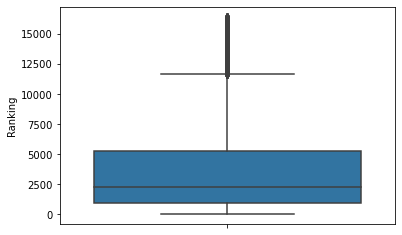

In [15]:
# Prepare and analyze ranking data
print('Prepare and analyze ranking data')
display('A little statistic of Ranking\n', meals_ds['Ranking'].describe())
sns.boxplot(y=meals_ds['Ranking'])
# display(meals_ds[meals_ds['Ranking'] == 16444][['URL_TA', 'Ranking']])
# plt.show()

# In statistic there are a few questions about outliers, but upon deeper analysis and review of the data on web-site we can draw a conclusion that data is correct and doesn't need clearing

In [16]:
# Prepare and analyze data of Reviews
print('Prepare and analyze data of Reviews')
meals_ds['Reviews'] = meals_ds['Reviews'].apply(reviews_splitting)  # Turn string into list with reviews and dates
meals_ds['review_dates'] = meals_ds['Reviews'].apply(lambda x: x[1])  # Create a new column with dates
meals_ds['review_dates'] = meals_ds['review_dates'].fillna(0)  # Fill empty values by zero values
meals_ds['Reviews'] = meals_ds['Reviews'].apply(lambda x: x[0])  # Fill column only with reviews

Prepare and analyze data of Reviews


In [17]:
# Restore Data from internet for columns Cuisine Style and Price Range
print('Restore data of Price Range from file')
restore_data = pd.read_csv('./frames.csv', sep='\t')  # Read the restored data from another file
restore_price = restore_data[['index_df', 'Price Range']].copy()  # Make a copy of data set for future work
# Fix the issue of None value in data set being a sting type. Turn them into NaN
restore_price['Price Range'] = restore_price['Price Range'].replace('None', np.nan)
restore_price = restore_price.dropna(how='any', axis=0)  # Drop all empty values from DS

Restore data of Price Range from file


In [18]:
print('Restore data of Cuisine Style from file')
restore_cuisine = restore_data[['index_df', 'Cuisine Style']].copy()  # Make a copy of data set for future work
restore_cuisine['Cuisine Style'] = restore_cuisine['Cuisine Style'].replace('None', np.nan)  # Same issue as with Price
restore_cuisine = restore_cuisine.dropna(how='any', axis=0)  # Drop all empty values from DS

Restore data of Cuisine Style from file


In [19]:
print('Restore empty values of Price Range')
# Restore data in main data set
for i in restore_price['index_df']:
    meals_ds.at[i, 'Price Range'] = str(restore_price[restore_price['index_df'] == i]['Price Range'].values) \
        .strip("[']")

print('Restore empty values of Cuisine Style')
for i in restore_cuisine['index_df']:
    meals_ds.at[i, 'Cuisine Style'] = str(restore_cuisine[restore_cuisine['index_df'] == i]['Cuisine Style'].values)

Restore empty values of Price Range
Restore empty values of Cuisine Style


In [20]:
#  Prepare data series of Price Range
print('Change string into num for column Price Range')
meals_ds['Price Range'] = meals_ds['Price Range'].replace(to_replace=dict_price)  # replace all values by dictionary

print('Fill empty values of median by town')
for city in city_set:
    median_ = meals_ds[meals_ds['City'] == city]['Price Range'].median()
    indexes = meals_ds.loc[meals_ds['City'] == city].index
    meals_ds.loc[indexes, 'Price Range'] = meals_ds.loc[indexes, 'Price Range'].fillna(median_)

Change string into num for column Price Range
Fill empty values of median by town


In [21]:
# prepare and analyze Cuisine Style
print('Creating cuisine style set')
meals_ds['Cuisine Style'] = meals_ds['Cuisine Style'].apply(str_to_list)  # Turn all values in column into list
cuisine_set = set(list(flatten(meals_ds['Cuisine Style'].dropna().values)))  # Create a set with cuisine styles

print('Create dummies for Cuisine Style')
for item in cuisine_set:
    meals_ds[item] = meals_ds['Cuisine Style'].apply(find_item)

print('Fill empty values by most popular cuisine')
# Group cuisines by city and fill empty values by most popular cuisine in the city
for city in city_set:
    city_cuisine = pop_cuisine(city)
    indexes = meals_ds.loc[meals_ds['City'] == city].index
    # Dummy value for most popular cuisine is 1. For other cuisines value is 0
    meals_ds.loc[indexes, city_cuisine] = meals_ds.loc[indexes, city_cuisine].fillna(1)
    meals_ds.loc[indexes, cuisine_set] = meals_ds.loc[indexes, cuisine_set].fillna(0)

# create dictionary for cuisines and write it into file
cuisine_dict = {}
f = open('cuisine_set.txt', 'w', encoding='utf-8')
for cuisine in cuisine_set:
    cuisine_dict[cuisine] = meals_ds[cuisine].sum()

for key, val in cuisine_dict.items():
    f.write('{}:{}\n'.format(key, val))

f.close()

Creating cuisine style set
Create dummies for Cuisine Style


<ipython-input-21-d35470b55907>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  meals_ds[item] = meals_ds['Cuisine Style'].apply(find_item)


Fill empty values by most popular cuisine


In [22]:
# Create additional columns of reviews. There are 3 columns for counting negative, neutral and positive reviews.
# Values are computed by function review_type
print('Create additional columns of reviews')
meals_ds[['negative_reviews', 'neutral_reviews', 'positive_reviews']] = \
    pd.DataFrame(list(meals_ds['Reviews'].apply(review_type)))

print('Turn last date into unix time')
# Create a column for last review and turn it's values into unix time type
meals_ds['last_review'] = meals_ds['review_dates'].apply(last_review)

Create additional columns of reviews
Turn last date into unix time


In [23]:
# Fill column Number of Reviews
print('Fill empty values for column Number of Reviews')
indexes = meals_ds[meals_ds['Number of Reviews'].isna()].index
for index in indexes:
    meals_ds.at[index, 'Number of Reviews'] = \
        meals_ds.loc[index, ['negative_reviews', 'neutral_reviews', 'positive_reviews']].sum()

print('Start the model')

Fill empty values for column Number of Reviews
Start the model


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [24]:
# Remove all unnecessary columns
X = meals_ds.drop(['Restaurant_id', 'Rating', 'ID_TA', 'URL_TA', 'Reviews', 'review_dates', 'City', 'Cuisine Style',
                   'Street Parking', 'Television', 'Medicinal foods', 'Live Music', 'Lombard', 'Fruit parlours',
                   'Cash Only', 'Burmese', 'Polynesian', 'Native American', 'Free Wifi', 'Outdoor Seating',
                   'Late Night', 'Takeout', 'Table Service', 'Cajun & Creole', 'Reservations', 'Seating'],
                  axis=1)
y = meals_ds['Rating']

In [25]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [26]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [27]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2088535
